GOT CHARACTER DEATH PREDICTION

Author details Author : Sree Lakshmi Sravya Duddupudi

Project Details : Machine Learning- Classification Analysis

Date :05-December - 2021
<br><BR><BR>


# . Importing the libraries

In [1]:
# importing all the necessary libraries
import pandas            as pd                       # data science essentials
import matplotlib.pyplot as plt                      # data visualization
import seaborn           as sns                      # enhanced data viz
from sklearn.model_selection import train_test_split # train-test split
from sklearn.linear_model import LogisticRegression  # logistic regression
import statsmodels.formula.api as smf                # logistic regression
from sklearn.metrics import confusion_matrix         # confusion matrix
from sklearn.metrics import roc_auc_score            # auc score
from sklearn.neighbors import KNeighborsClassifier   # KNN for classification
from sklearn.neighbors import KNeighborsRegressor    # KNN for regression
from sklearn.preprocessing import StandardScaler     # standard scaler
from sklearn.tree import DecisionTreeClassifier      # classification trees
from sklearn.tree import plot_tree                   # tree plots



from sklearn.model_selection import RandomizedSearchCV     # hyperparameter tuning
from sklearn.metrics import make_scorer  
from sklearn.ensemble import RandomForestClassifier     # random forest
from sklearn.ensemble import GradientBoostingClassifier # gbm# customizable scorer
from sklearn.ensemble import GradientBoostingRegressor


# setting pandas print options
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

#IMPORTING WARNINGS 
import warnings
warnings.filterwarnings('ignore')

# .  Data Exploration

In [2]:
#loading the dataset 
df = pd.read_excel("downloads/GOT_character_predictions.xlsx")

In [3]:
# outputting the first ten rows of the dataset
df.head(n = 10)

,S.No,name,title,culture,dateOfBirth,mother,father,heir,house,spouse,book1_A_Game_Of_Thrones,book2_A_Clash_Of_Kings,book3_A_Storm_Of_Swords,book4_A_Feast_For_Crows,book5_A_Dance_with_Dragons,isAliveMother,isAliveFather,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,popularity,isAlive
0,1,Viserys II Targaryen,NaN,NaN,NaN,Rhaenyra Targaryen,Daemon Targaryen,Aegon IV Targaryen,NaN,NaN,0,0,0,0,0,1.0,0.0,0.0,NaN,0,0,NaN,11,0.605351,0
1,2,Walder Frey,Lord of the Crossing,Rivermen,208.0,NaN,NaN,NaN,House Frey,Perra Royce,1,1,1,1,1,NaN,NaN,NaN,1.0,1,1,97.0,1,0.896321,1
2,3,Addison Hill,Ser,NaN,NaN,NaN,NaN,NaN,House Swyft,NaN,0,0,0,1,0,NaN,NaN,NaN,NaN,0,1,NaN,0,0.267559,1
3,4,Aemma Arryn,Queen,NaN,82.0,NaN,NaN,NaN,House Arryn,Viserys I Targaryen,0,0,0,0,0,NaN,NaN,NaN,0.0,1,1,23.0,0,0.183946,0
4,5,Sylva Santagar,Greenstone,Dornish,276.0,NaN,NaN,NaN,House Santagar,Eldon Estermont,0,0,0,1,0,NaN,NaN,NaN,1.0,1,1,29.0,0,0.043478,1
5,6,Tommen Baratheon,NaN,NaN,NaN,Cersei Lannister,Robert Baratheon,Myrcella Baratheon,NaN,NaN,0,0,0,0,0,1.0,1.0,1.0,NaN,0,0,NaN,5,1.000000,1
6,7,Valarr Targaryen,Hand of the King,Valyrian,183.0,NaN,NaN,NaN,House Targaryen,Kiera of Tyrosh,0,0,0,0,0,NaN,NaN,NaN,1.0,1,1,26.0,0,0.431438,0
7,8,Viserys I Targaryen,NaN,NaN,NaN,Alyssa Targaryen,Baelon Targaryen,Rhaenyra Targaryen,NaN,NaN,0,0,0,0,0,1.0,1.0,1.0,NaN,0,0,NaN,5,0.678930,0
8,9,Wilbert,Ser,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,1,0,0,NaN,NaN,NaN,NaN,0,1,NaN,0,0.006689,0
9,10,Wilbert Osgrey,Ser,NaN,NaN,NaN,NaN,NaN,House Osgrey,NaN,0,0,0,0,0,NaN,NaN,NaN,NaN,0,1,NaN,0,0.020067,1


In [4]:
# Checking for NANs values
nans = df.isna().sum()
nans[nans > 0]

title            1008
culture          1269
dateOfBirth      1513
mother           1925
father           1920
heir             1923
house             427
spouse           1670
isAliveMother    1925
isAliveFather    1920
isAliveHeir      1923
isAliveSpouse    1670
age              1513
dtype: int64

In [5]:
# checking the mean age of the data set
print(df["age"].mean())

-1293.5635103926097


The mean age of the characters is negative which is not possible generally, so we need to figure out what characters have negative ages in order to decide if there has been any wrong inputs.

In [6]:
# Check the characters that have a negative value for age.
print(df["name"][df["age"] < 0])
print(df['age'][df['age'] < 0])


1684    Doreah
1868    Rhaego
Name: name, dtype: object
1684   -277980.0
1868   -298001.0
Name: age, dtype: float64


We now have to check for the real ages of these two characters. Upon finding the age of Doreah is 25 and Rhaego was not even born.

In [7]:
# Replace negative ages with the real ages of the characters 
df.loc[1684, "age"] = 25.0
df.loc[1868, "age"] = 0.0

In [8]:
# Checking the mean age again
print(df["age"].mean())

36.70438799076212


In [9]:
# Filling the nans we can
df["age"].fillna(df["age"].mean(), inplace=True)
df["culture"].fillna("", inplace=True)

# Some nans values are nan because we dont know them so filling them with -1
df.fillna(value=-1, inplace=True)

In [10]:
#Checkin if the nan values got replaced
df.isnull().sum()

S.No                          0
name                          0
title                         0
culture                       0
dateOfBirth                   0
mother                        0
father                        0
heir                          0
house                         0
spouse                        0
book1_A_Game_Of_Thrones       0
book2_A_Clash_Of_Kings        0
book3_A_Storm_Of_Swords       0
book4_A_Feast_For_Crows       0
book5_A_Dance_with_Dragons    0
isAliveMother                 0
isAliveFather                 0
isAliveHeir                   0
isAliveSpouse                 0
isMarried                     0
isNoble                       0
age                           0
numDeadRelations              0
popularity                    0
isAlive                       0
dtype: int64

<BR><BR><BR>
    All the NaN values got replaced.
    
 <BR><BR><BR>

# . Plotting  graphs

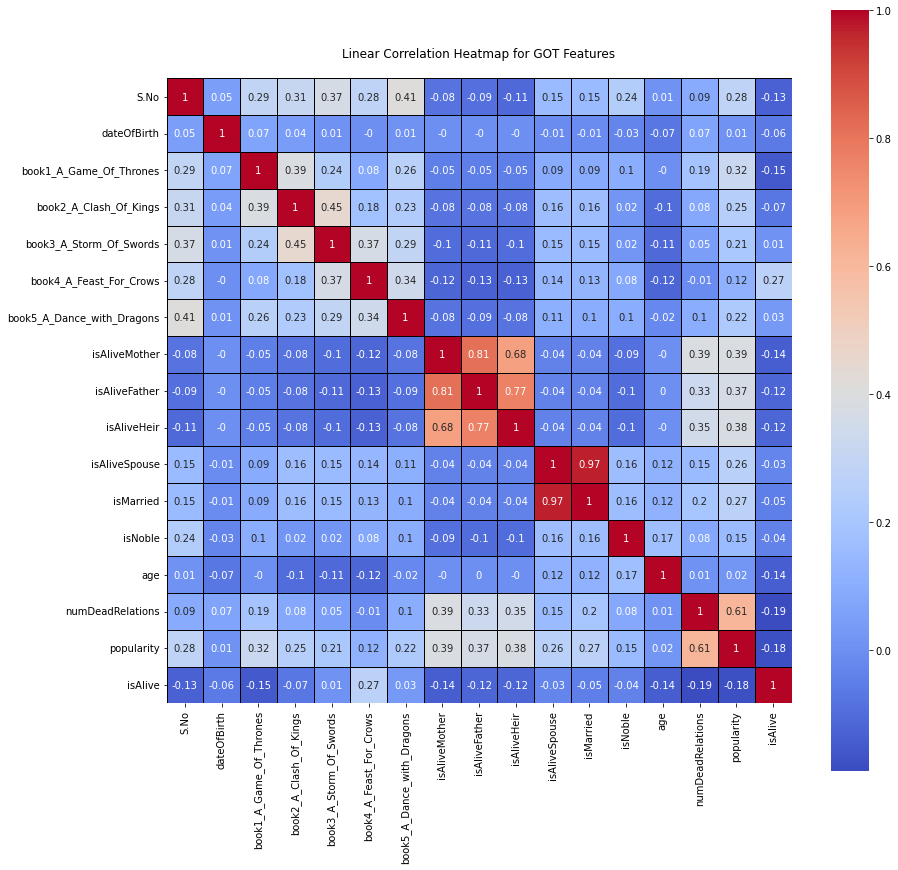

In [11]:
# linear (Pearson) correlation
df_corr = df.corr(method = 'pearson').round(decimals = 2)

# Fixing the plotsize
fig, ax = plt.subplots(figsize=(14,14))


# developing a coolwarm heatmap
sns.heatmap(data       = df_corr, # the correlation matrix
            cmap       = 'coolwarm',    # changing to MEDIUM colors
            square     = True,          # tightening the layout
            annot      = True,          # should there be numbers in the heatmap
            linecolor  = 'black',       # lines between boxes
            linewidths = 0.5)           # how thick should the lines be?


# title and displaying the plot
plt.title("""
Linear Correlation Heatmap for GOT Features
""")

plt.show()

In [12]:
# Getting linear (Pearson) correlation
df.corr(method = 'pearson').round(decimals = 2)

,S.No,dateOfBirth,book1_A_Game_Of_Thrones,book2_A_Clash_Of_Kings,book3_A_Storm_Of_Swords,book4_A_Feast_For_Crows,book5_A_Dance_with_Dragons,isAliveMother,isAliveFather,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,popularity,isAlive
S.No,1.00,0.05,0.29,0.31,0.37,0.28,0.41,-0.08,-0.09,-0.11,0.15,0.15,0.24,0.01,0.09,0.28,-0.13
dateOfBirth,0.05,1.00,0.07,0.04,0.01,-0.00,0.01,-0.00,-0.00,-0.00,-0.01,-0.01,-0.03,-0.07,0.07,0.01,-0.06
book1_A_Game_Of_Thrones,0.29,0.07,1.00,0.39,0.24,0.08,0.26,-0.05,-0.05,-0.05,0.09,0.09,0.10,-0.00,0.19,0.32,-0.15
book2_A_Clash_Of_Kings,0.31,0.04,0.39,1.00,0.45,0.18,0.23,-0.08,-0.08,-0.08,0.16,0.16,0.02,-0.10,0.08,0.25,-0.07
book3_A_Storm_Of_Swords,0.37,0.01,0.24,0.45,1.00,0.37,0.29,-0.10,-0.11,-0.10,0.15,0.15,0.02,-0.11,0.05,0.21,0.01
book4_A_Feast_For_Crows,0.28,-0.00,0.08,0.18,0.37,1.00,0.34,-0.12,-0.13,-0.13,0.14,0.13,0.08,-0.12,-0.01,0.12,0.27
book5_A_Dance_with_Dragons,0.41,0.01,0.26,0.23,0.29,0.34,1.00,-0.08,-0.09,-0.08,0.11,0.10,0.10,-0.02,0.10,0.22,0.03
isAliveMother,-0.08,-0.00,-0.05,-0.08,-0.10,-0.12,-0.08,1.00,0.81,0.68,-0.04,-0.04,-0.09,-0.00,0.39,0.39,-0.14
isAliveFather,-0.09,-0.00,-0.05,-0.08,-0.11,-0.13,-0.09,0.81,1.00,0.77,-0.04,-0.04,-0.10,0.00,0.33,0.37,-0.12
isAliveHeir,-0.11,-0.00,-0.05,-0.08,-0.10,-0.13,-0.08,0.68,0.77,1.00,-0.04,-0.04,-0.10,-0.00,0.35,0.38,-0.12


In [13]:
# Declaring X variables
df_data = df.drop({'isAlive','name' ,'culture','dateOfBirth','mother','father','heir' ,'house','spouse','title'}, axis = 1)


# Declaring the Y variable
df_target = df.loc[ : , 'isAlive']

In [14]:
# Splitting the dataset.
x_train, x_test, y_train, y_test = train_test_split(
            df_data,
            df_target,
            test_size    = 0.10,
            random_state = 219,
            stratify     = df_target) # preserving balance


# Merging the training data for statsmodels
df_train = pd.concat([x_train, y_train], axis = 1)

In [15]:
print(f"""

Response Variable Proportions (Training Set)
--------------------------------------------
{y_train.value_counts(normalize = True).round(decimals = 2)}


Response Variable Proportions (Testing Set)
--------------------------------------------
{y_test.value_counts(normalize = True).round(decimals = 2)}
""")



Response Variable Proportions (Training Set)
--------------------------------------------
1    0.75
0    0.25
Name: isAlive, dtype: float64


Response Variable Proportions (Testing Set)
--------------------------------------------
1    0.74
0    0.26
Name: isAlive, dtype: float64



In [16]:
# Declaring set of x-variables that are significant
x_variables = ['book1_A_Game_Of_Thrones',
                'gender_guesser_female',
                'gender_guesser_male',
                'gender_guesser_unknown',
                'book4_A_Feast_For_Crows',
                'numDeadRelations',
                'popularity',
                'age'
                ]

# Looping to make x-variables suitable for statsmodels
for val in x_variables:
    print(f"{val} +")

book1_A_Game_Of_Thrones +
gender_guesser_female +
gender_guesser_male +
gender_guesser_unknown +
book4_A_Feast_For_Crows +
numDeadRelations +
popularity +
age +


In [17]:
#running models
########################################
# optimal_neighbors
########################################
def optimal_neighbors(x_data,
                      y_data,
                      standardize = True,
                      pct_test=0.1,
                      seed=219,
                      response_type='reg',
                      max_neighbors=20,
                      show_viz=True):
    
    
    
    if standardize == True:
        # optionally standardizing x_data
        scaler             = StandardScaler()
        scaler.fit(x_data)
        x_scaled           = scaler.transform(x_data)
        x_scaled_df        = pd.DataFrame(x_scaled)
        x_data             = x_scaled_df



    # train-test split
    x_train, x_test, y_train, y_test = train_test_split(x_data,
                                                        y_data,
                                                        test_size = pct_test,
                                                        random_state = seed)


    # creating lists for training set accuracy and test set accuracy
    training_accuracy = []
    test_accuracy = []
    
    
    # setting neighbor range
    neighbors_settings = range(1, max_neighbors + 1)


    for n_neighbors in neighbors_settings:
        # building the model based on response variable type
        if response_type == 'reg':
            clf = KNeighborsRegressor(n_neighbors = n_neighbors)
            clf.fit(x_train, y_train)
            
        elif response_type == 'class':
            clf = KNeighborsClassifier(n_neighbors = n_neighbors)
            clf.fit(x_train, y_train)            
            
        else:
            print("Error: response_type must be 'reg' or 'class'")
        
        
        # recording the training set accuracy
        training_accuracy.append(clf.score(x_train, y_train))
    
        # recording the generalization accuracy
        test_accuracy.append(clf.score(x_test, y_test))


    # optionally displaying visualization
    if show_viz == True:
        # plotting the visualization
        fig, ax = plt.subplots(figsize=(12,8))
        plt.plot(neighbors_settings, training_accuracy, label = "training accuracy")
        plt.plot(neighbors_settings, test_accuracy, label = "test accuracy")
        plt.ylabel("Accuracy")
        plt.xlabel("n_neighbors")
        plt.legend()
        plt.show()
    
    
    # returning optimal number of neighbors
    print(f"The optimal number of neighbors is: {test_accuracy.index(max(test_accuracy))+1}")
    return test_accuracy.index(max(test_accuracy))+1


########################################
# visual_cm
########################################
def visual_cm(true_y, pred_y, labels = None):
   
    # visualizing the confusion matrix

    # setting labels
    lbls = labels
    

    # declaring a confusion matrix object
    cm = confusion_matrix(y_true = true_y,
                          y_pred = pred_y)


    # heatmap
    sns.heatmap(cm,
                annot       = True,
                xticklabels = lbls,
                yticklabels = lbls,
                cmap        = 'Blues',
                fmt         = 'g')


    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix of the Classifier')
    plt.show()

# . Logistic Regression

In [18]:
# logit regression

df_corr = df.corr(method = 'pearson').round(decimals = 2)

df_corr['isAlive'].sort_values(ascending = False)

isAlive                       1.00
book4_A_Feast_For_Crows       0.27
book5_A_Dance_with_Dragons    0.03
book3_A_Storm_Of_Swords       0.01
isAliveSpouse                -0.03
isNoble                      -0.04
isMarried                    -0.05
dateOfBirth                  -0.06
book2_A_Clash_Of_Kings       -0.07
isAliveFather                -0.12
isAliveHeir                  -0.12
S.No                         -0.13
isAliveMother                -0.14
age                          -0.14
book1_A_Game_Of_Thrones      -0.15
popularity                   -0.18
numDeadRelations             -0.19
Name: isAlive, dtype: float64

In [19]:
# Instantiating a logistic regression model object
logistic_small = smf.logit(formula   = """isAlive ~ book4_A_Feast_For_Crows """,
                           data = df_train)


# Fitting the model object
results_logistic = logistic_small.fit()


# Checking the results SUMMARY
results_logistic.summary2() # summary2() has AIC and BIC

Optimization terminated successfully.
         Current function value: 0.534562
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                           Results: Logit
====================================================================
Model:               Logit             Pseudo R-squared:  0.057     
Dependent Variable:  isAlive           AIC:               1876.0368 
Date:                2021-12-05 21:36  BIC:               1886.9727 
No. Observations:    1751              Log-Likelihood:    -936.02   
Df Model:            1                 LL-Null:           -992.53   
Df Residuals:        1749              LLR p-value:       2.1241e-26
Converged:           1.0000            Scale:             1.0000    
No. Iterations:      6.0000                                         
--------------------------------------------------------------------
                        Coef.  Std.Err.    z    P>|z|  [0.025 0.975]
--------------------------------------------------------------------
Intercept               0.4601   0.0765  6.0172 0.0000 0.3102 0.6100
book4_A_Feast_For_Crows 1.1895   0.1141 10.4212 0.0000 0.9658 1.4132
====================================================================

"""

In [20]:
# Instantiating a logistic regression model object
logistic_full = smf.logit(formula = """ isAlive ~ 
 book2_A_Clash_Of_Kings + 
 book4_A_Feast_For_Crows + 
 age + 
 numDeadRelations + 
 popularity

 """,
                                        data    = df_train)


# Fitting the model object
results_full = logistic_full.fit()


# Checking the results SUMMARY
results_full.summary2()

Optimization terminated successfully.
         Current function value: 0.500893
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                            Results: Logit
=======================================================================
Model:                Logit              Pseudo R-squared:   0.116     
Dependent Variable:   isAlive            AIC:                1766.1269 
Date:                 2021-12-05 21:36   BIC:                1798.9346 
No. Observations:     1751               Log-Likelihood:     -877.06   
Df Model:             5                  LL-Null:            -992.53   
Df Residuals:         1745               LLR p-value:        6.7215e-48
Converged:            1.0000             Scale:              1.0000    
No. Iterations:       6.0000                                           
-----------------------------------------------------------------------
                         Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
-----------------------------------------------------------------------
Intercept                1.5983   0.2049  7.8001 0.0000  1.1967  1.9999
book2_A_Clash_Of_Kings  -0.5682   0.1276 -4.4536 0.0000 -0.8182 -0.3181
book4_A_Feast_For_Crows  1.3891   0.1260 11.0263 0.0000  1.1421  1.6360
age                     -0.0215   0.0047 -4.5184 0.0000 -0.0308 -0.0121
numDeadRelations        -0.1567   0.0526 -2.9760 0.0029 -0.2599 -0.0535
popularity              -1.6316   0.4443 -3.6725 0.0002 -2.5024 -0.7608
=======================================================================

"""

In [21]:
# creating a dictionary to store candidate models

candidate_dict = {

 # full model
 'logit_full'   : ['book4_A_Feast_For_Crows', 'book2_A_Clash_Of_Kings', 'book1_A_Game_Of_Thrones','isNoble', 'age', 'popularity',
                   'numDeadRelations', 'isAliveFather'],
 

 # significant variables only (set 1)
 'logit_sig'    : ['book4_A_Feast_For_Crows' , 'book2_A_Clash_Of_Kings', 'age', 'popularity',
                   'numDeadRelations'],
    
    
 # significant variables only (set 2)
 'logit_sig_2'  : ['book4_A_Feast_For_Crows', 'popularity', 'numDeadRelations',
                   'isNoble', 'book1_A_Game_Of_Thrones']

}

In [22]:
# printing candidate variable sets
print(f"""
--------------------------
Explanatory Variable Sets 
--------------------------

Full Model:
-----------
{candidate_dict['logit_full']}


First Significant p-value Model:
--------------------------------
{candidate_dict['logit_sig']}


Second Significant p-value Model:
---------------------------------
{candidate_dict['logit_sig_2']}
""")


--------------------------
Explanatory Variable Sets 
--------------------------

Full Model:
-----------
['book4_A_Feast_For_Crows', 'book2_A_Clash_Of_Kings', 'book1_A_Game_Of_Thrones', 'isNoble', 'age', 'popularity', 'numDeadRelations', 'isAliveFather']


First Significant p-value Model:
--------------------------------
['book4_A_Feast_For_Crows', 'book2_A_Clash_Of_Kings', 'age', 'popularity', 'numDeadRelations']


Second Significant p-value Model:
---------------------------------
['book4_A_Feast_For_Crows', 'popularity', 'numDeadRelations', 'isNoble', 'book1_A_Game_Of_Thrones']



In [23]:
# train/test split with the full model
df_data   =  df.loc[ : , candidate_dict['logit_sig']]
df_target =  df.loc[ : , 'isAlive']


# This is the exact code we were using before
x_train, x_test, y_train, y_test = train_test_split(
            df_data,
            df_target,
            test_size    = 0.10,
            random_state = 219,
            stratify     = df_target)


# INSTANTIATING a logistic regression model
logreg = LogisticRegression(solver = 'lbfgs',
                            C = 1,
                            random_state = 219)


# FITTING the training data
logreg_fit = logreg.fit(x_train, y_train)


# PREDICTING based on the testing set
logreg_pred = logreg_fit.predict(x_test)


# SCORING the results
print('Training ACCURACY:', logreg_fit.score(x_train, y_train).round(4))
print('Testing  ACCURACY:', logreg_fit.score(x_test, y_test).round(4))


# saving scoring data for future use
logreg_train_score = logreg_fit.score(x_train, y_train).round(4) # accuracy
logreg_test_score  = logreg_fit.score(x_test, y_test).round(4) # accuracy

Training ACCURACY: 0.771
Testing  ACCURACY: 0.8051


In [24]:
# creating a confusion matrix
# unpacking the confusion matrix
logreg_tn, \
logreg_fp, \
logreg_fn, \
logreg_tp = confusion_matrix(y_true = y_test, y_pred = logreg_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {logreg_tn}
False Positives: {logreg_fp}
False Negatives: {logreg_fn}
True Positives : {logreg_tp}
""")


True Negatives : 14
False Positives: 36
False Negatives: 2
True Positives : 143



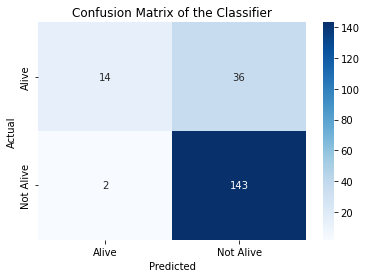

In [25]:
# calling the visual_cm function
visual_cm(true_y = y_test,
          pred_y = logreg_pred,
          labels = ['Alive', 'Not Alive'])

In [26]:
# area under the roc curve (auc)
print(roc_auc_score(y_true  = y_test,
                    y_score = logreg_pred).round(decimals = 4))


# saving AUC score for future use
logreg_auc_score = roc_auc_score(y_true  = y_test,
                                 y_score = logreg_pred).round(decimals = 4)

0.6331


In [27]:
# zipping each feature name to its coefficient
logreg_model_values = zip(df[candidate_dict['logit_sig_2']].columns,
                          logreg_fit.coef_.ravel().round(decimals = 2))


# setting up a placeholder list to store model features
logreg_model_lst = [('intercept', logreg_fit.intercept_[0].round(decimals = 2))]


# printing out each feature-coefficient pair one by one
for val in logreg_model_values:
    logreg_model_lst.append(val)
    

# checking the results
for pair in logreg_model_lst:
    print(pair)

('intercept', 1.6)
('book4_A_Feast_For_Crows', 1.35)
('popularity', -0.57)
('numDeadRelations', -0.02)
('isNoble', -1.36)
('book1_A_Game_Of_Thrones', -0.18)


# . CART MODELS

In [28]:
########################################
# plot_feature_importances
########################################
def plot_feature_importances(model, train, export = False):
    
    
    # declaring the number
    n_features = x_train.shape[1]
    
    # setting plot window
    fig, ax = plt.subplots(figsize=(12,9))
    
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), train.columns)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    
    if export == True:
        plt.savefig('Tree_Leaf_50_Feature_Importance.png')

<BR><BR><BR>
    Decision Tree Classifier

In [29]:
# Instantiating a classification tree object
full_tree = DecisionTreeClassifier()


# Fitting the training data
full_tree_fit = full_tree.fit(x_train, y_train)


# Predicting on new data
full_tree_pred = full_tree_fit.predict(x_test)


# Scoring the model
print('Full Tree Training ACCURACY:', full_tree_fit.score(x_train,
                                                     y_train).round(4))

print('Full Tree Testing ACCURACY :', full_tree_fit.score(x_test,
                                                     y_test).round(4))

print('Full Tree AUC Score:', roc_auc_score(y_true  = y_test,
                                            y_score = full_tree_pred).round(4))


# saving scoring data for future use
full_tree_train_score = full_tree_fit.score(x_train, y_train).round(4) # accuracy
full_tree_test_score  = full_tree_fit.score(x_test, y_test).round(4)   # accuracy


# saving AUC
full_tree_auc_score   = roc_auc_score(y_true  = y_test,
                                      y_score = full_tree_pred).round(4) # auc

Full Tree Training ACCURACY: 0.8766
Full Tree Testing ACCURACY : 0.7692
Full Tree AUC Score: 0.681


In [30]:
# unpacking the confusion matrix
full_tree_tn, \
full_tree_fp, \
full_tree_fn, \
full_tree_tp = confusion_matrix(y_true = y_test, y_pred = full_tree_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {full_tree_tn}
False Positives: {full_tree_fp}
False Negatives: {full_tree_fn}
True Positives : {full_tree_tp}

""")



True Negatives : 25
False Positives: 25
False Negatives: 20
True Positives : 125




In [34]:
# INSTANTIATING a classification tree object
pruned_tree = DecisionTreeClassifier(max_depth = 8,
                                     min_samples_leaf = 25,
                                     random_state = 219)


# FITTING the training data
pruned_tree_fit  = pruned_tree.fit(x_train, y_train)


# PREDICTING on new data
pruned_tree_pred = pruned_tree_fit.predict(x_test)


# SCORING the model
print('Training ACCURACY:', pruned_tree_fit.score(x_train, y_train).round(4))
print('Testing  ACCURACY:', pruned_tree_fit.score(x_test, y_test).round(4))
print('AUC Score        :', roc_auc_score(y_true  = y_test,
                                          y_score = pruned_tree_pred).round(4))


# saving scoring data for future use
pruned_tree_train_score = pruned_tree_fit.score(x_train, y_train).round(4) # accuracy
pruned_tree_test_score  = pruned_tree_fit.score(x_test, y_test).round(4)   # accuracy


# saving auc score
pruned_tree_auc_score   = roc_auc_score(y_true  = y_test,
                                        y_score = pruned_tree_pred).round(4) # auc

Training ACCURACY: 0.799
Testing  ACCURACY: 0.8308
AUC Score        : 0.7224


In [38]:
# unpacking the confusion matrix
pruned_tree_tn, \
pruned_tree_fp, \
pruned_tree_fn, \
pruned_tree_tp = confusion_matrix(y_true = y_test, y_pred = pruned_tree_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {pruned_tree_tn}
False Positives: {pruned_tree_fp}
False Negatives: {pruned_tree_fn}
True Positives : {pruned_tree_tp}
""")


True Negatives : 25
False Positives: 25
False Negatives: 8
True Positives : 137



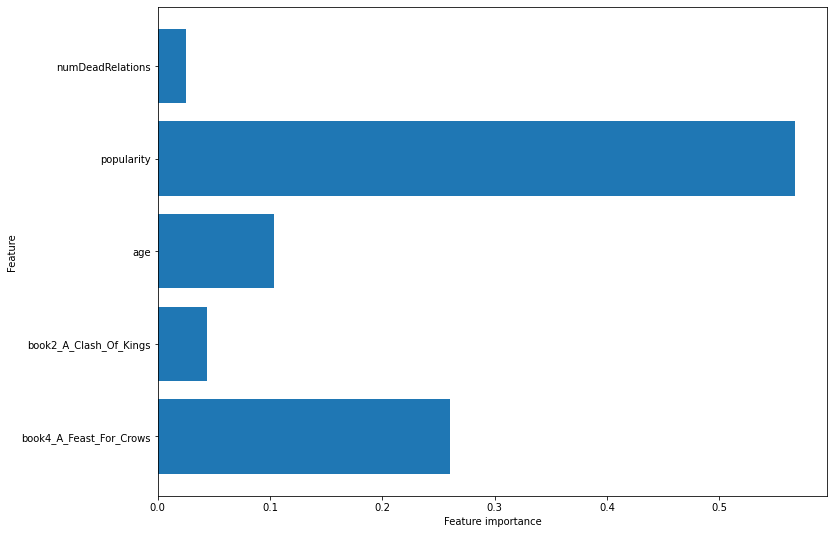

In [39]:
# plotting feature importance
plot_feature_importances(pruned_tree_fit,
                         train = x_train,
                         export = False)

In [40]:
# comparing results
print(f"""
Model         AUC Score      TN, FP, FN, TP
-----         ---------      --------------
Logistic      {logreg_auc_score}         {logreg_tn, logreg_fp, logreg_fn, logreg_tp}
Full Tree     {full_tree_auc_score}           {full_tree_tn, full_tree_fp, full_tree_fn, full_tree_tp}
Pruned Tree   {pruned_tree_auc_score}         {pruned_tree_tn, pruned_tree_fp, pruned_tree_fn, pruned_tree_tp}
""")


# creating a dictionary for model results
model_performance = {
    
    'Model Name'    : ['Logistic', 'Full Tree', 'Pruned Tree'],
           
    'AUC Score' : [logreg_auc_score, full_tree_auc_score, pruned_tree_auc_score],
    
    'Training Accuracy' : [logreg_train_score, full_tree_train_score,
                           pruned_tree_train_score],
           
    'Testing Accuracy'  : [logreg_test_score, full_tree_test_score,
                           pruned_tree_test_score],

    'Confusion Matrix'  : [(logreg_tn, logreg_fp, logreg_fn, logreg_tp),
                           (full_tree_tn, full_tree_fp, full_tree_fn, full_tree_tp),
                           (pruned_tree_tn, pruned_tree_fp, pruned_tree_fn, pruned_tree_tp)]}


# converting model_performance into a DataFrame
model_performance = pd.DataFrame(model_performance)


# sending model results to Excel
model_performance.to_excel('/Users/sravyaduddupudi/Downloads/path_practice/__results/classification_model_performance_new.xlsx',
                          index = False)


Model         AUC Score      TN, FP, FN, TP
-----         ---------      --------------
Logistic      0.6331         (14, 36, 2, 143)
Full Tree     0.681           (25, 25, 20, 125)
Pruned Tree   0.7224         (25, 25, 8, 137)



# . KNN CLASSIFICATION  

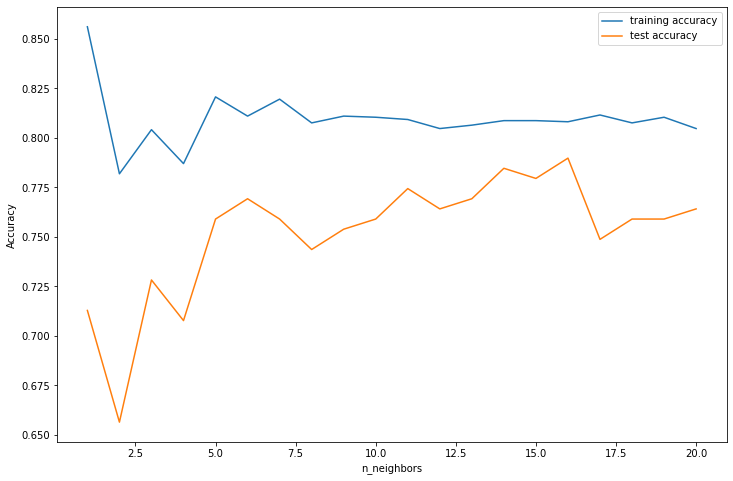

The optimal number of neighbors is: 16


In [43]:
# determining the optimal number of neighbors
opt_neighbors = optimal_neighbors(x_data        = df_data,
                                  y_data        = df_target,
                                  response_type = 'class')

In [44]:
# INSTANTIATING StandardScaler()
scaler = StandardScaler()


# FITTING the data
scaler.fit(df_data)


# TRANSFORMING the data
x_scaled     = scaler.transform(df_data)


# converting to a DataFrame
x_scaled_df  = pd.DataFrame(x_scaled) 


# train-test split with the scaled data
x_train_scaled, x_test_scaled, y_train_scaled, y_test_scaled = train_test_split(
            x_scaled_df,
            df_target,
            random_state = 219,
            test_size    = 0.10,
            stratify     = df_target)


# Instantiating a KNN classification model with optimal neighbors
knn_opt = KNeighborsClassifier(n_neighbors = opt_neighbors)


# Fittin the training data
knn_fit = knn_opt.fit(x_train_scaled, y_train_scaled)


# Predicting based on the testing set
knn_pred = knn_fit.predict(x_test_scaled)


# Scorin the results
print('Training ACCURACY:', knn_fit.score(x_train_scaled, y_train_scaled).round(4))
print('Testing  ACCURACY:', knn_fit.score(x_test_scaled, y_test_scaled).round(4))
print('AUC Score        :', roc_auc_score(y_true  = y_test,
                                          y_score = knn_pred).round(4))


# Saving scoring data
knn_train_score = knn_fit.score(x_train_scaled, y_train_scaled).round(4)
knn_test_score  = knn_fit.score(x_test_scaled, y_test_scaled).round(4)


# Saving AUC score
knn_auc_score   = roc_auc_score(y_true  = y_test,
                                          y_score = knn_pred).round(4)

Training ACCURACY: 0.8013
Testing  ACCURACY: 0.8205
AUC Score        : 0.7155


In [45]:
# Unpacking the confusion matrix
knn_tree_tn, \
knn_tree_fp, \
knn_tree_fn, \
knn_tree_tp = confusion_matrix(y_true = y_test, y_pred = knn_pred).ravel()


# Printing each result one-by-one
print(f"""
True Negatives : {pruned_tree_tn}
False Positives: {pruned_tree_fp}
False Negatives: {pruned_tree_fn}
True Positives : {pruned_tree_tp}
""")


True Negatives : 25
False Positives: 25
False Negatives: 8
True Positives : 137



In [47]:
# Declaring model performance objects for knn
knn_train_score = knn_fit.score(x_train_scaled, y_train_scaled).round(4)
knn_test_score  = knn_fit.score(x_test_scaled, y_test_scaled).round(4)
knn_auc_score   = roc_auc_score(y_true  = y_test,
                                          y_score = knn_pred).round(4)


# Appending to model_performance
model_performance = model_performance.append(
                          {'Model Name'        : 'KNN',
                           'Training Accuracy' : knn_train_score,
                           'Testing Accuracy'  : knn_test_score,
                           'AUC Score'         : knn_auc_score,
                           'Confusion Matrix'  : (knn_tree_tn,
                                                  knn_tree_fp,
                                                  knn_tree_fn,
                                                  knn_tree_tp)},
                           ignore_index = True)


model_performance = pd.DataFrame(model_performance)


# Sending model results to Excel
model_performance.to_excel('/Users/sravyaduddupudi/Downloads/path_practice/__results/classification_model_performance_new.xlsx',
                          index = False)

In [48]:


# Loading model performance
model_performance = pd.read_excel('/Users/sravyaduddupudi/Downloads/path_practice/__results/classification_model_performance_new.xlsx')


# Setting pandas print options
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.max_colwidth', 100)


########################################
# Explanatory variable sets
########################################
candidate_dict = {

 # Full model
 'logit_full'   : ['book4_A_Feast_For_Crows', 'book2_A_Clash_Of_Kings', 'book1_A_Game_Of_Thrones','isNoble', 'age', 'popularity',
                   'numDeadRelations', 'isAliveFather'],
 

 # Significant variables only (set 1)
 'logit_sig'    : ['book4_A_Feast_For_Crows' , 'book2_A_Clash_Of_Kings', 'age', 'popularity',
                   'numDeadRelations'],
    
    
 # Significant variables only (set 2)
 'logit_sig_2'  : ['book4_A_Feast_For_Crows', 'popularity', 'numDeadRelations',
                   'isNoble', 'book1_A_Game_Of_Thrones']
    
}


########################################
# checking previous model performances
########################################
model_performance

,Model Name,AUC Score,Training Accuracy,Testing Accuracy,Confusion Matrix
0,Logistic,0.6331,0.7710,0.8051,"(14, 36, 2, 143)"
1,Full Tree,0.6810,0.8766,0.7692,"(25, 25, 20, 125)"
2,Pruned Tree,0.7224,0.7990,0.8308,"(25, 25, 8, 137)"
3,KNN,0.7155,0.8013,0.8205,"(25, 25, 10, 135)"
4,KNN,0.7155,0.8013,0.8205,"(25, 25, 10, 135)"


# . Performing Logistic Regression with Hyperparameters

In [49]:
# Instantiating a logistic regression model with default values
lr_default = LogisticRegression(solver = 'lbfgs',
                                C = 1.0,
                                warm_start = False,
                                random_state = 219)

In [50]:
# Fitting the training data
lr_default_fit = lr_default.fit(x_train, y_train)


# Predicting based on the testing set
lr_default_pred = lr_default_fit.predict(x_test)


# Scoring the results
print('Training ACCURACY:', lr_default_fit.score(x_train, y_train).round(4))
print('Testing  ACCURACY:', lr_default_fit.score(x_test, y_test).round(4))


# Scoring with AUC
print('AUC Score        :', roc_auc_score(y_true  = y_test,
                                          y_score = lr_default_pred).round(4))


# Saving scoring data for future use
logreg_train_score = lr_default_fit.score(x_train, y_train).round(4) # accuracy
logreg_test_score  = lr_default_fit.score(x_test, y_test).round(4)   # accuracy


# Saving AUC score
logreg_auc_score = roc_auc_score(y_true  = y_test,
                                 y_score = lr_default_pred).round(4)

Training ACCURACY: 0.771
Testing  ACCURACY: 0.8051
AUC Score        : 0.6331


<BR><BR><BR>
    
# . Hyperparameter Tuning with RandomizedSearchCV

In [54]:
# ########################################
# # RandomizedSearchCV
# ########################################

# # declaring a hyperparameter space
# C_range          = np.arange(0.1, 5.0, 0.1)
# warm_start_range = [True, False]
# solver_range     = ['newton-cg', 'sag', 'lbfgs']


# # creating a hyperparameter grid
# param_grid = {'C'          : C_range,
#               'warm_start' : warm_start_range,
#               'solver'     : solver_range}


# # INSTANTIATING the model object without hyperparameters
# lr_tuned = LogisticRegression(random_state = 219,
#                               max_iter     = 1000) # increased for convergence


# # GridSearchCV object
# lr_tuned_cv = RandomizedSearchCV(estimator           = lr_tuned,   # the model object
#                                  param_distributions = param_grid, # parameters to tune
#                                  cv                  = 3,          # how many folds in cross-validation
#                                  n_iter              = 250,        # number of combinations of hyperparameters to try
#                                  random_state        = 219,        # starting point for random sequence
#                                  scoring = make_scorer(
#                                            roc_auc_score,
#                                            needs_threshold = False)) # scoring criteria (AUC)


# # FITTING to the FULL DATASET (due to cross-validation)
# lr_tuned_cv.fit(df_data, df_target)


# # PREDICT step is not needed


# # printing the optimal parameters and best score
# print("Tuned Parameters  :", lr_tuned_cv.best_params_)
# print("Tuned CV AUC      :", lr_tuned_cv.best_score_.round(4))

Tuned Parameters  : {'warm_start': False, 'solver': 'lbfgs', 'C': 4.8}
Tuned CV AUC      : 0.5867


In [52]:
lr_tuned_cv.cv_results_

{'mean_fit_time': array([0.09180045, 0.01400312, 0.01162704, 0.01181801, 0.09256403,
        0.01495997, 0.09102329, 0.01457874, 0.08991869, 0.08523695,
        0.01188572, 0.02040044, 0.01706711, 0.09050433, 0.01908755,
        0.08666476, 0.01163721, 0.01616375, 0.08917061, 0.01564566,
        0.0138456 , 0.01139291, 0.01248598, 0.08906031, 0.01577139,
        0.09118613, 0.08522828, 0.0152692 , 0.0897553 , 0.01581097,
        0.09039537, 0.01393398, 0.0139854 , 0.01167568, 0.01516732,
        0.01241231, 0.01226298, 0.02423461, 0.09153008, 0.01294001,
        0.01236804, 0.01091003, 0.05606723, 0.08621025, 0.01907667,
        0.01391896, 0.01465996, 0.01049391, 0.09289265, 0.01310476,
        0.01167671, 0.09117389, 0.08512807, 0.08495696, 0.0139943 ,
        0.0937589 , 0.01198363, 0.09579833, 0.01190392, 0.01454298,
        0.01629194, 0.08924373, 0.08498955, 0.01459853, 0.09262633,
        0.01584872, 0.01119884, 0.09171263, 0.01858226, 0.01230772,
        0.01122737, 0.01330908,

In [55]:
lr_tuned_cv.best_estimator_

LogisticRegression(C=4.8, max_iter=1000, random_state=219)

In [73]:
# building a model based on hyperparameter tuning results

# INSTANTIATING a logistic regression model with tuned values
lr_tuned = LogisticRegression(C            = 4.7,
                              warm_start   = False,
                              solver       = 'lbfgs',
                              max_iter     = 1000,
                              random_state = 219)


# FITTING the model to the full dataset
lr_tuned.fit(df_data, df_target) # this is ok because already tuned


# PREDICTING based on the testing set
lr_tuned_pred = lr_tuned.predict(x_test)


# SCORING the results
print('LR Tuned Training ACCURACY:', lr_tuned.score(x_train, y_train).round(4))
print('LR Tuned Testing  ACCURACY:', lr_tuned.score(x_test, y_test).round(4))
print('LR Tuned AUC Score        :', roc_auc_score(y_true  = y_test,
                                          y_score = lr_tuned_pred).round(4))


# saving scoring data for future use
lr_tuned_train_score = lr_tuned.score(x_train, y_train).round(4) # accuracy
lr_tuned_test_score  = lr_tuned.score(x_test, y_test).round(4)   # accuracy


# saving the AUC score
lr_tuned_auc         = roc_auc_score(y_true  = y_test,
                                     y_score = lr_tuned_pred).round(4) # auc

LR Tuned Training ACCURACY: 0.7727
LR Tuned Testing  ACCURACY: 0.8154
LR Tuned AUC Score        : 0.6531


In [74]:
# unpacking the confusion matrix
lr_tuned_tn, \
lr_tuned_fp, \
lr_tuned_fn, \
lr_tuned_tp = confusion_matrix(y_true = y_test, y_pred = lr_tuned_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {lr_tuned_tn}
False Positives: {lr_tuned_fp}
False Negatives: {lr_tuned_fn}
True Positives : {lr_tuned_tp}
""")


True Negatives : 16
False Positives: 34
False Negatives: 2
True Positives : 143



In [75]:
# loading model performance
model_performance = pd.read_excel('/Users/sravyaduddupudi/Downloads/path_practice/__results/classification_model_performance_new.xlsx')


# declaring model performance objects
lr_train_acc = lr_tuned.score(x_train, y_train).round(4)
lr_test_acc  = lr_tuned.score(x_test, y_test).round(4)
lr_auc       = roc_auc_score(y_true  = y_test,
                             y_score = lr_tuned_pred).round(4)


# appending to model_performance
model_performance = model_performance.append(
                          {'Model Name'        : 'Tuned LR',
                           'Training Accuracy' : lr_train_acc,
                           'Testing Accuracy'  : lr_test_acc,
                           'AUC Score'         : lr_auc,
                           'Confusion Matrix'  : (lr_tuned_tn,
                                                  lr_tuned_fp,
                                                  lr_tuned_fn,
                                                  lr_tuned_tp)},
                           ignore_index = True)


# checking the results
model_performance

,Model Name,AUC Score,Training Accuracy,Testing Accuracy,Confusion Matrix
0,Logistic,0.6331,0.7710,0.8051,"(14, 36, 2, 143)"
1,Full Tree,0.6810,0.8766,0.7692,"(25, 25, 20, 125)"
2,Pruned Tree,0.7224,0.7990,0.8308,"(25, 25, 8, 137)"
3,KNN,0.7155,0.8013,0.8205,"(25, 25, 10, 135)"
4,KNN,0.7155,0.8013,0.8205,"(25, 25, 10, 135)"
5,Tuned LR,0.6531,0.7727,0.8154,"(16, 34, 2, 143)"


# . Hyperparameter Tuning on Classification Trees

In [76]:
# declaring a hyperparameter space
criterion_range = ['gini', 'entropy']
splitter_range  = ['best', 'random']
depth_range     = np.arange(1, 25, 1)
leaf_range      = np.arange(1, 100, 1)


# creating a hyperparameter grid
param_grid = {'criterion'        : criterion_range,
              'splitter'         : splitter_range,
              'max_depth'        : depth_range,
              'min_samples_leaf' : leaf_range}


# INSTANTIATING the model object without hyperparameters
tuned_tree = DecisionTreeClassifier(random_state = 219)


# RandomizedSearchCV object
tuned_tree_cv = RandomizedSearchCV(estimator             = tuned_tree,
                                   param_distributions   = param_grid,
                                   cv                    = 3,
                                   n_iter                = 1000,
                                   random_state          = 219,
                                   scoring = make_scorer(roc_auc_score,
                                             needs_threshold = False))


# FITTING to the FULL DATASET (due to cross-validation)
tuned_tree_cv.fit(df_data, df_target)


# PREDICT step is not needed


# printing the optimal parameters and best score
print("Tuned Parameters  :", tuned_tree_cv.best_params_)
print("Tuned Training AUC:", tuned_tree_cv.best_score_.round(4))

Tuned Parameters  : {'splitter': 'random', 'min_samples_leaf': 6, 'max_depth': 6, 'criterion': 'gini'}
Tuned Training AUC: 0.6721



<BR><BR><BR>Build a classification tree model based on the hyperparameter tuning results.

In [77]:
# building a model based on hyperparameter tuning results

# INSTANTIATING a logistic regression model with tuned values
tree_tuned = DecisionTreeClassifier(splitter         = 'random',
                                    min_samples_leaf = 3,
                                    max_depth        = 8,
                                    criterion        = 'entropy',
                                    random_state     = 219)


# FITTING to the FULL DATASET (due to cross-validation)
tree_tuned_fit = tree_tuned.fit(df_data, df_target)


# PREDICTING based on the testing set
tree_tuned_pred = tree_tuned.predict(x_test)


# SCORING the results
print('Training ACCURACY:', tree_tuned.score(x_train, y_train).round(4))
print('Testing  ACCURACY:', tree_tuned.score(x_test, y_test).round(4))
print('AUC Score        :', roc_auc_score(y_true  = y_test,
                                          y_score = tree_tuned_pred).round(4))


# Saving scoring data for future use
tree_tuned_train_score = tree_tuned.score(x_train, y_train).round(4) # accuracy
tree_tuned_test_score  = tree_tuned.score(x_test, y_test).round(4)   # accuracy


# Saving the AUC score
tree_tuned_auc         = roc_auc_score(y_true  = y_test,
                                       y_score = tree_tuned_pred).round(4) # auc

Training ACCURACY: 0.8058
Testing  ACCURACY: 0.8513
AUC Score        : 0.7428


In [78]:
# unpacking the confusion matrix
tuned_tree_tn, \
tuned_tree_fp, \
tuned_tree_fn, \
tuned_tree_tp = confusion_matrix(y_true = y_test, y_pred = tree_tuned_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {tuned_tree_tn}
False Positives: {tuned_tree_fp}
False Negatives: {tuned_tree_fn}
True Positives : {tuned_tree_tp}
""")


True Negatives : 26
False Positives: 24
False Negatives: 5
True Positives : 140



In [79]:
# declaring model performance objects
tree_train_acc = tree_tuned.score(x_train, y_train).round(4)
tree_test_acc  = tree_tuned.score(x_test, y_test).round(4)
tree_auc       = roc_auc_score(y_true  = y_test,
                              y_score = tree_tuned_pred).round(4)


# appending to model_performance
model_performance = model_performance.append(
                          {'Model Name'        : 'Tuned Tree',
                           'Training Accuracy' : tree_train_acc,
                           'Testing Accuracy'  : tree_test_acc,
                           'AUC Score'         : tree_auc,
                           'Confusion Matrix'  : (tuned_tree_tn,
                                                  tuned_tree_fp,
                                                  tuned_tree_fn,
                                                  tuned_tree_tp)},
                           ignore_index = True)


# checking the results
model_performance

,Model Name,AUC Score,Training Accuracy,Testing Accuracy,Confusion Matrix
0,Logistic,0.6331,0.7710,0.8051,"(14, 36, 2, 143)"
1,Full Tree,0.6810,0.8766,0.7692,"(25, 25, 20, 125)"
2,Pruned Tree,0.7224,0.7990,0.8308,"(25, 25, 8, 137)"
3,KNN,0.7155,0.8013,0.8205,"(25, 25, 10, 135)"
4,KNN,0.7155,0.8013,0.8205,"(25, 25, 10, 135)"
5,Tuned LR,0.6531,0.7727,0.8154,"(16, 34, 2, 143)"
6,Tuned Tree,0.7428,0.8058,0.8513,"(26, 24, 5, 140)"


# . Randon Forest Models

In [59]:
# INSTANTIATING a random forest model with default values
rf_default = RandomForestClassifier(n_estimators     = 350,
                                    criterion        = 'entropy',
                                    min_samples_leaf = 8,
                                    warm_start       = False,
                                    random_state     = 219)

In [60]:
# FITTING the training data
rf_default_fit = rf_default.fit(x_train, y_train)


# PREDICTING based on the testing set
rf_default_fit_pred = rf_default_fit.predict(x_test)


# SCORING the results
print('Training ACCURACY:', rf_default_fit.score(x_train, y_train).round(4))
print('Testing  ACCURACY:', rf_default_fit.score(x_test, y_test).round(4))


# saving AUC score
print('AUC Score        :', roc_auc_score(y_true  = y_test,
                                          y_score = rf_default_fit_pred).round(4))

Training ACCURACY: 0.8081
Testing  ACCURACY: 0.8359
AUC Score        : 0.7128


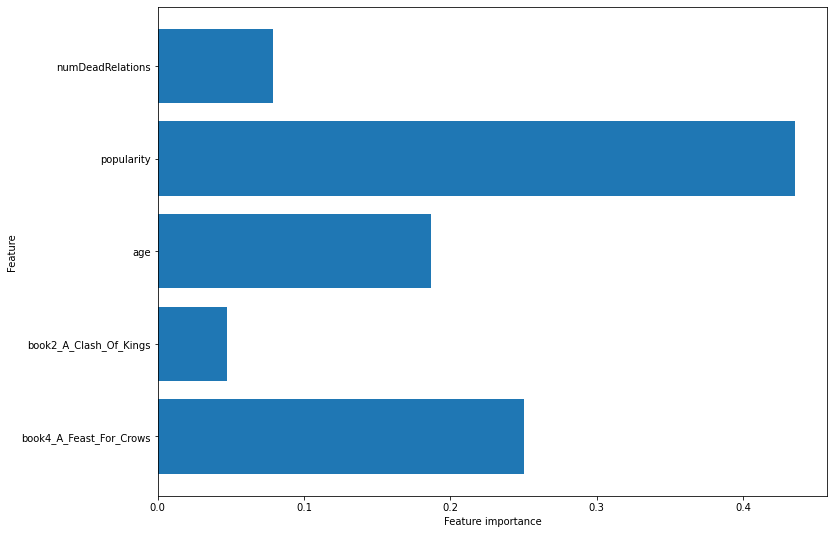

In [61]:
#plotting the feature importance graph
plot_feature_importances(rf_default_fit,x_train,export= False)

In [62]:
# unpacking the confusion matrix
rf_tn, \
rf_fp, \
rf_fn, \
rf_tp = confusion_matrix(y_true = y_test, y_pred = rf_default_fit_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {rf_tn}
False Positives: {rf_fp}
False Negatives: {rf_fn}
True Positives : {rf_tp}
""")


True Negatives : 23
False Positives: 27
False Negatives: 5
True Positives : 140



In [63]:
# declaring model performance objects
rf_train_acc = rf_default_fit.score(x_train, y_train).round(4)
rf_test_acc  = rf_default_fit.score(x_test, y_test).round(4)
rf_auc       = roc_auc_score(y_true  = y_test,
                             y_score = rf_default_fit_pred).round(4)


# appending to model_performance
model_performance = model_performance.append(
                          {'Model Name'         : 'Random Forest (Full)',
                           'Training Accuracy'  : rf_train_acc,
                           'Testing Accuracy'   : rf_test_acc,
                           'AUC Score'          : rf_auc,
                           'Confusion Matrix'   : (rf_tn,
                                                   rf_fp,
                                                   rf_fn,
                                                   rf_tp)},
                          ignore_index = True)


# checking the results
model_performance

,Model Name,AUC Score,Training Accuracy,Testing Accuracy,Confusion Matrix
0,Logistic,0.6331,0.7710,0.8051,"(14, 36, 2, 143)"
1,Full Tree,0.6810,0.8766,0.7692,"(25, 25, 20, 125)"
2,Pruned Tree,0.7224,0.7990,0.8308,"(25, 25, 8, 137)"
3,KNN,0.7155,0.8013,0.8205,"(25, 25, 10, 135)"
4,KNN,0.7155,0.8013,0.8205,"(25, 25, 10, 135)"
5,Random Forest (Full),0.7128,0.8081,0.8359,"(23, 27, 5, 140)"


Random Forest Tuning (COMMENTED ON THE TUNING TO RUN FASTER)

In [64]:
# # FITTING the training data
# rf_default_fit = rf_default.fit(x_train, y_train)


# # PREDICTING based on the testing set
# rf_default_fit_pred = rf_default_fit.predict(x_test)


# # declaring a hyperparameter space
# estimator_range  = np.arange(100, 1100, 250)
# leaf_range       = np.arange(1, 31, 10)
# criterion_range  = ['gini', 'entropy']
# bootstrap_range  = [True, False]
# warm_start_range = [True, False]


# # creating a hyperparameter grid
# param_grid = {'n_estimators'     : estimator_range,
#               'min_samples_leaf' : leaf_range,
#               'criterion'        : criterion_range,
#               'bootstrap'        : bootstrap_range,
#               'warm_start'       : warm_start_range}


# # INSTANTIATING the model object without hyperparameters
# forest_grid = RandomForestClassifier(random_state = 219)


# # GridSearchCV object
# forest_cv = RandomizedSearchCV(estimator           = forest_grid,
#                                param_distributions = param_grid,
#                                cv         = 3,
#                                n_iter     = 1000,
#                                scoring    = make_scorer(roc_auc_score,
#                                             needs_threshold = False))


# # FITTING to the FULL DATASET (due to cross-validation)
# forest_cv.fit(df_data, df_target)


# # PREDICT step is not needed


# # printing the optimal parameters and best score
# print("Tuned Parameters  :", forest_cv.best_params_)
# print("Tuned Training AUC:", forest_cv.best_score_.round(4))

Tuned Parameters  : {'warm_start': True, 'n_estimators': 600, 'min_samples_leaf': 11, 'criterion': 'gini', 'bootstrap': False}
Tuned Training AUC: 0.6513


In [66]:
forest_cv.best_estimator_

RandomForestClassifier(bootstrap=False, min_samples_leaf=11, n_estimators=600,
                       random_state=219, warm_start=True)

In [80]:
# INSTANTIATING a random forest model with default values




forest_tuned = RandomForestClassifier(criterion        = 'entropy',
                                      min_samples_leaf = 1,
                                      n_estimators     = 100,
                                      warm_start       = True,
                                      bootstrap        = False,
                                      random_state     = 219)


# FITTING to the FULL DATASET (due to cross-validation)
forest_tuned_fit = forest_tuned.fit(df_data, df_target)


# PREDICTING based on the testing set
forest_tuned_pred = forest_tuned_fit.predict(x_test)


# # saving AUC score
# print('AUC Score        :', roc_auc_score(y_true  = y_test,
#                                           y_score = rf_default_fit_pred).round(4))

# SCORING the results
print('Forest Tuned Training ACCURACY:', forest_tuned.score(x_train, y_train).round(4))
print('Forest Tuned Testing  ACCURACY:', forest_tuned.score(x_test, y_test).round(4))
print('Forest Tuned AUC Score        :', roc_auc_score(y_true  = y_test,
                                                       y_score = forest_tuned_pred).round(4))


# saving scoring data for future use
forest_tuned_train_score = forest_tuned.score(x_train, y_train).round(4) # accuracy
forest_tuned_test_score  = forest_tuned.score(x_test, y_test).round(4)   # accuracy


# saving the AUC score
forest_tuned_auc = roc_auc_score(y_true  = y_test,
                                 y_score = forest_tuned_pred).round(4) # auc

Forest Tuned Training ACCURACY: 0.8749
Forest Tuned Testing  ACCURACY: 0.9179
Forest Tuned AUC Score        : 0.8662


In [81]:
# unpacking the confusion matrix
tuned_rf_tn, \
tuned_rf_fp, \
tuned_rf_fn, \
tuned_rf_tp = confusion_matrix(y_true = y_test, y_pred = forest_tuned_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {tuned_rf_tn}
False Positives: {tuned_rf_fp}
False Negatives: {tuned_rf_fn}
True Positives : {tuned_rf_tp}
""")


True Negatives : 38
False Positives: 12
False Negatives: 4
True Positives : 141



In [83]:
# appending to model_performance
model_performance = model_performance.append(
                          {'Model Name'         : 'Random Forest (Tuned)',
                           'Training Accuracy'  : forest_tuned_train_score,
                           'Testing Accuracy'   : forest_tuned_test_score,
                           'AUC Score'          : forest_tuned_auc,
                           'Confusion Matrix'   : (tuned_rf_tn,
                                                   tuned_rf_fp,
                                                   tuned_rf_fn,
                                                   tuned_rf_tp)},
                          ignore_index = True)


# checking the results
model_performance

,Model Name,AUC Score,Training Accuracy,Testing Accuracy,Confusion Matrix
0,Logistic,0.6331,0.7710,0.8051,"(14, 36, 2, 143)"
1,Full Tree,0.6810,0.8766,0.7692,"(25, 25, 20, 125)"
2,Pruned Tree,0.7224,0.7990,0.8308,"(25, 25, 8, 137)"
3,KNN,0.7155,0.8013,0.8205,"(25, 25, 10, 135)"
4,KNN,0.7155,0.8013,0.8205,"(25, 25, 10, 135)"
5,Tuned LR,0.6531,0.7727,0.8154,"(16, 34, 2, 143)"
6,Tuned Tree,0.7428,0.8058,0.8513,"(26, 24, 5, 140)"
7,Random Forest (Tuned),0.8662,0.8749,0.9179,"(38, 12, 4, 141)"
8,Random Forest (Tuned),0.8662,0.8749,0.9179,"(38, 12, 4, 141)"


<BR><BR><BR>

# . GBM

In [84]:
# INSTANTIATING the model object without hyperparameters
full_gbm_default = GradientBoostingClassifier(loss          = 'deviance',
                                              learning_rate = 0.1,
                                              n_estimators  = 100,
                                              criterion     = 'friedman_mse',
                                              max_depth     = 3,
                                              warm_start    = False,
                                              random_state  = 219)


# FIT step is needed as we are not using .best_estimator
full_gbm_default_fit = full_gbm_default.fit(x_train, y_train)


# PREDICTING based on the testing set
full_gbm_default_pred = full_gbm_default_fit.predict(x_test)


# SCORING the results
print('Training ACCURACY:', full_gbm_default_fit.score(x_train, y_train).round(4))
print('Testing ACCURACY :', full_gbm_default_fit.score(x_test, y_test).round(4))
print('AUC Score        :', roc_auc_score(y_true  = y_test,
                                          y_score = full_gbm_default_pred).round(4))

Training ACCURACY: 0.823
Testing ACCURACY : 0.8308
AUC Score        : 0.7159


In [71]:
# unpacking the confusion matrix
gbm_default_tn, \
gbm_default_fp, \
gbm_default_fn, \
gbm_default_tp = confusion_matrix(y_true = y_test, y_pred = full_gbm_default_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {gbm_default_tn}
False Positives: {gbm_default_fp}
False Negatives: {gbm_default_fn}
True Positives : {gbm_default_tp}
""")


True Negatives : 24
False Positives: 26
False Negatives: 7
True Positives : 138



In [85]:
# declaring model performance objects
gbm_train_acc = full_gbm_default_fit.score(x_train, y_train).round(4)
gbm_test_acc  = full_gbm_default_fit.score(x_test, y_test).round(4)
gbm_auc       = roc_auc_score(y_true  = y_test,
                              y_score = full_gbm_default_pred).round(4)


# appending to model_performance
model_performance = model_performance.append(
                          {'Model Name'       : 'GBM (Full)',
                          'Training Accuracy' : gbm_train_acc,
                          'Testing Accuracy'  : gbm_test_acc,
                          'AUC Score'         : gbm_auc,
                          'Confusion Matrix'  : (gbm_default_tn,
                                                 gbm_default_fp,
                                                 gbm_default_fn,
                                                 gbm_default_tp)},
                          ignore_index = True)


# checking the results
model_performance

,Model Name,AUC Score,Training Accuracy,Testing Accuracy,Confusion Matrix
0,Logistic,0.6331,0.7710,0.8051,"(14, 36, 2, 143)"
1,Full Tree,0.6810,0.8766,0.7692,"(25, 25, 20, 125)"
2,Pruned Tree,0.7224,0.7990,0.8308,"(25, 25, 8, 137)"
3,KNN,0.7155,0.8013,0.8205,"(25, 25, 10, 135)"
4,KNN,0.7155,0.8013,0.8205,"(25, 25, 10, 135)"
5,Tuned LR,0.6531,0.7727,0.8154,"(16, 34, 2, 143)"
6,Tuned Tree,0.7428,0.8058,0.8513,"(26, 24, 5, 140)"
7,Random Forest (Tuned),0.8662,0.8749,0.9179,"(38, 12, 4, 141)"
8,Random Forest (Tuned),0.8662,0.8749,0.9179,"(38, 12, 4, 141)"
9,GBM (Full),0.7159,0.8230,0.8308,"(24, 26, 7, 138)"


# .CONCLUSION

Random forest is our best model.
